In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

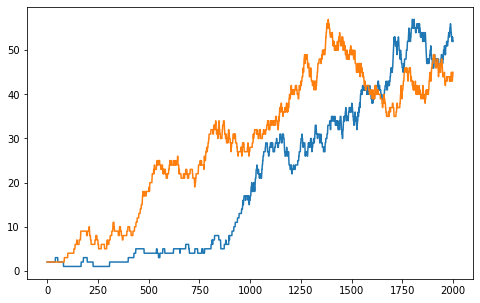

In [5]:
def simulation_discret(N=100,beta=1,gamma=0.25,b=0.25,dt=0.01,temps=2000,i0=2):
    P=np.zeros((N+1,N+1),dtype=float)
    P[0,0]=1
    P[N,N-1]=(b+gamma)*N*dt
    P[N,N]=1-P[N-1,N-2]
    for i in range(1,N-1):
        P[i,i+1] = beta*i*(N-i)*(dt/N)
        P[i,i-1] = (b+gamma)*i*dt
        P[i,i] = 1.0 -(P[i,i+1] + P[i,i-1])
    
    n_etat = [i for i in range(N+1)]
    I=[i0]
    for k in np.arange(1.0,2000,1):
        rand = np.random.choice(n_etat,p=P[I[-1],:])
        etat0 = np.zeros((N+1))
        etat0[rand] = 1
        next_etat = np.argmax(etat0.dot(P))
        I.append(next_etat)
    return I

sim1 = simulation_discret() 
sim2 = simulation_discret()
plt.figure(figsize=(8,5))
plt.plot(sim1)
plt.plot(sim2)

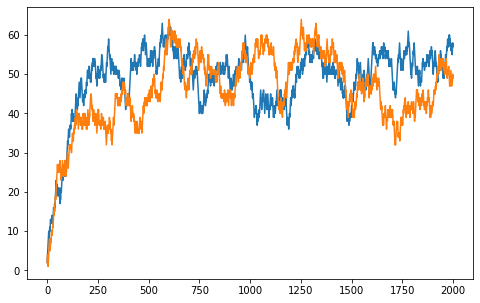

In [18]:
def simulation_continue(N=100,beta=1,gamma=0.25,b=0.25,dt=0.01,temps=2000,i0=2): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    I = np.zeros((temps)) 
    S[0] = N-i0
    I[0] = i0
    t[0] = 0
    i = 0 
    while I[i] > 0 and i < (temps-1): 
        U1 = np.random.rand() 
        U2 = np.random.rand() 
        a=(beta/N)*I[i]*S[i]+(b+gamma)*I[i]
        probi = (beta*S[i]/N)/((beta*S[i]/N) +(b+gamma)) 
        h = - np.log(U1)/a
        t[i+1] = t[i] + h           
        if U2 <= probi: 
            S[i+1] = S[i] - 1  
            I[i+1] = I[i] + 1
            
        else:                 
            S[i+1] = S[i] + 1 
            I[i+1] = I[i] - 1

        i += 1
        
    return S,I
S,I = simulation_continue()
S1,I1 = simulation_continue()
plt.figure(figsize=(8,5))
plt.plot(I)
plt.plot(I1)

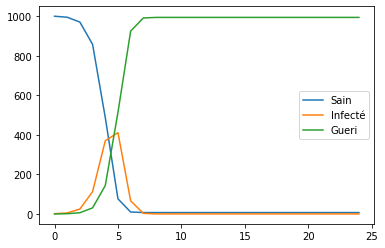

In [16]:
class reed_forest:
    def __init__(self, S_initial, I_initial, R_initial):
        self.S_liste = [S_initial] 
        self.I_liste = [I_initial]
        self.R_liste = [R_initial]
        
    def graphe(self,n_temps,p):  
        self.propabilite = p
        S_liste = self.S_liste
        I_liste = self.I_liste
        R_liste = self.R_liste
        temps = range(0,n_temps,1) 
        self.temps = temps
        for i in range(len(temps)-1):
            I_liste.append((1-(1-p)**I_liste[i])*S_liste[i])
            S_liste.append(S_liste[i] - I_liste[i+1])
            R_liste.append(R_liste[i] + I_liste[i])
       
        plt.figure()
        plt.plot(temps,S_liste,label='Sain')
        plt.plot(temps,I_liste,label='Infecté')
        plt.plot(temps,R_liste,label='Gueri')
        plt.legend()
        return plt.show()

model1 = reed_forest(1000,1,0)
model1.graphe(25,0.005)